# Practice Project 2.1 - Preparing School Data

As always, we start with the Problem Solving Framework

## Business Understanding

<p>A school district wants to predict the per pupil costs of a school based on some high level summary data about the school. This way they’ll have a good estimation of how well a school is managing its costs relative to what the model would predict. You’ve been asked to to prepare the data for modelling.</p>

## Data Understanding

<p>We’ve been given four CSV files that contain data for two different school districts. We can find these files in the data folder.</p>

- DistrictA_Attendance - This file contains average daily attendance, percent attendance, and pupil-teacher ratio data for the 25 schools in district A.

- DistrictA_Finance - This file contains average monthly teacher salary and per pupil cost data for the 25 schools in district A.

- DistrictB_Attendance - This file contains average daily attendance, percent attendance, and pupil-teacher ratio data for the 21 schools in district B.

- DistrictB_Finance - This file contains average monthly teacher salary and per pupil cost data for the 21 schools in district B.


In [55]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
districta_attendance = pd.read_csv("data/districta-attendance.csv")
districta_finance = pd.read_csv("data/districta-finance.csv")
districtb_attendance = pd.read_csv("data/districtb-attendance.csv")
districtb_finance = pd.read_csv("data/districtb-finance.csv")

In [87]:
# Explore the dataset
districta_attendance

,School,Average daily Attendance,Percent Attendance,Pupil/Teacher ratio
0,Adair,451.4,90.77,33.8
1,Crew,440.6,89.32,36.3
2,Davis,139.4,86.51,22.6
3,Faith,427.3,91.12,30.0
4,Formwalt,706.1,89.46,32.5
5,Forrest,4312.0,89.72,36.0
6,Georgia,464.2,90.53,29.2
7,Goldsmith,227.7,92.81,30.8
8,Gordon,551.4,91.98,31.9
9,Grant Park,684.0,86.47,28.6


In [4]:
# drop the last two columns
districta_attendance.drop(columns=['Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)

In [86]:
districta_finance.head()

,School,Value,Metric
0,Adair,66.90,Per-Pupil Cost
1,Crew,61.08,Per-Pupil Cost
2,Davis,105.21,Per-Pupil Cost
3,Faith,75.35,Per-Pupil Cost
4,Formwalt,59.45,Per-Pupil Cost


In [6]:
# Check the number of rows and columns for District A 
print("The number of rows of DistrictA_attendance:", districta_attendance.shape[0])
print("The number of columns of DistrictA_attendance:", districta_attendance.shape[1])
print("The number of rows of DistrictA_finance:", districta_finance.shape[0])
print("The number of columns of DistrictA_finance:", districta_finance.shape[1])

The number of rows of DistrictA_attendance: 24
The number of columns of DistrictA_attendance: 4
The number of rows of DistrictA_finance: 46
The number of columns of DistrictA_finance: 3


In [85]:
districtb_attendance.head()

,School,Average daily Attendance,Percent Attendance,Pupil/Teacher ratio
0,East Lake,225.3,91.07,36.7
1,Milton,262.5,93.48,31.3
2,Sylvan Hills,294.1,92.43,33.6
3,Calhoun,NaN,NaN,23.0
4,Jones,238.3,90.38,27.9


In [9]:
districtb_finance.head()

,School,Value,Metric
0,East Lake,61.91,Per-Pupil Cost
1,Milton,90.21,Per-Pupil Cost
2,Sylvan Hills,59.27,Per-Pupil Cost
3,Calhoun,108.57,Per-Pupil Cost
4,Jones,81.47,Per-Pupil Cost


In [10]:
# Check the number of rows and columns for District B
print("The number of rows of DistrictB_attendance:", districta_attendance.shape[0])
print("The number of columns of DistrictB_attendance:", districtb_attendance.shape[1])
print("The number of rows of DistrictB_finance:", districtb_finance.shape[0])
print("The number of columns of DistrictB_finance:", districtb_finance.shape[1])

The number of rows of DistrictB_attendance: 24
The number of columns of DistrictB_attendance: 4
The number of rows of DistrictB_finance: 40
The number of columns of DistrictB_finance: 3


## Data Formating and Blending

Select School as the group by value, metric as the column headers, and value for the Values for New Columns. This will format the data in the same way the attendance data is formatted. 

In [36]:
f_a = districta_finance.groupby(['School']).agg(
    SAL=pd.NamedAgg(column='Value', aggfunc='max'),
    PPC=pd.NamedAgg(column='Value', aggfunc='min')).reset_index()

In [38]:
f_b = districtb_finance.groupby(['School']).agg(
    SAL=pd.NamedAgg(column='Value', aggfunc='max'),
    PPC=pd.NamedAgg(column='Value', aggfunc='min')).reset_index()

## Data Preparation

### Step 1: Combine the data

<p>First we’ll need to combine the data from the various files into one sheet, with one row per school.</p>
    

In [39]:
# Fisrt, merge districta_attendance and f_a together on the same School
districtA = pd.merge(districta_attendance, f_a, on='School')
districtA.head()

,School,Average daily Attendance,Percent Attendance,Pupil/Teacher ratio,SAL,PPC
0,Adair,451.4,90.77,33.8,160.22,66.90
1,Crew,440.6,89.32,36.3,146.24,61.08
2,Davis,139.4,86.51,22.6,159.79,105.21
3,Faith,427.3,91.12,30.0,152.39,75.35
4,Formwalt,706.1,89.46,32.5,139.11,59.45


In [40]:
# Second, merge districtb_attendance and f_b together on the same School
districtB = pd.merge(districtb_attendance, f_b, on='School')
districtB.head()

,School,Average daily Attendance,Percent Attendance,Pupil/Teacher ratio,SAL,PPC
0,East Lake,225.3,91.07,36.7,106.74,61.91
1,Milton,262.5,93.48,31.3,165.13,90.21
2,Sylvan Hills,294.1,92.43,33.6,116.53,59.27
3,Calhoun,NaN,NaN,23.0,161.79,108.57
4,Jones,238.3,90.38,27.9,132.17,81.47


In [41]:
# Lastly, concat districtA and districtB together
schools = pd.concat([districtA, districtB], sort=False)
schools.head()

,School,Average daily Attendance,Percent Attendance,Pupil/Teacher ratio,SAL,PPC
0,Adair,451.4,90.77,33.8,160.22,66.90
1,Crew,440.6,89.32,36.3,146.24,61.08
2,Davis,139.4,86.51,22.6,159.79,105.21
3,Faith,427.3,91.12,30.0,152.39,75.35
4,Formwalt,706.1,89.46,32.5,139.11,59.45


In [42]:
# Rows and columns of combined dataset
schools.shape

(44, 6)

We have now 44 rows and 6 columns.

### Step 2: Clean the Data

<p>Next we’ll clean the data, which includes addressing duplicate data, missing data, and any other data issues.</p>
    

In [43]:
# Drop duplicated data if any
schools.drop_duplicates(subset=['School'], inplace=True)

In [44]:
# Rename columns
schools.rename(columns={'Average daily Attendance':'ATT', 'Percent Attendance':'PATT', 'Pupil/Teacher ratio':'PTR'}, inplace=True)

In [45]:
# Check missing values 
schools.isnull().sum()

School    0
ATT       2
PATT      2
PTR       0
SAL       0
PPC       0
dtype: int64

From the above result we have found that ATT(Average daily attendace and Percent Attendance) and PATT has missing 2 values, therefore we going to drop the missing rows.


In [46]:
# Drop missing rows
schools.dropna(axis=0, inplace=True)
# check the missing values again
schools.isnull().sum()

School    0
ATT       0
PATT      0
PTR       0
SAL       0
PPC       0
dtype: int64

In [47]:
# reset index
schools.reset_index(drop=True, inplace=True)

In [48]:
schools

,School,ATT,PATT,PTR,SAL,PPC
0,Adair,451.4,90.77,33.8,160.22,66.90
1,Crew,440.6,89.32,36.3,146.24,61.08
2,Davis,139.4,86.51,22.6,159.79,105.21
3,Faith,427.3,91.12,30.0,152.39,75.35
4,Formwalt,706.1,89.46,32.5,139.11,59.45
5,Forrest,4312.0,89.72,36.0,154.99,59.03
6,Goldsmith,227.7,92.81,30.8,141.34,71.76
7,Gordon,551.4,91.98,31.9,153.19,66.96
8,Grant Park,684.0,86.47,28.6,135.70,73.26
9,Harris,585.1,93.15,29.2,148.77,65.65


As we can see the above table our dataset is cleaned and we have 41 rows and 6 columns.

### Step 3: Identify and Deal with Outliers

Lastly, we’ll look for outliers and determine the best way to address them.

<p>To check for outliers, let’s start with some scatterplots to visualize the relationship between each predictor variable and the target variable. Since there are four predictor variables, let’s plot in four scatterplot using seaborn library.</p>

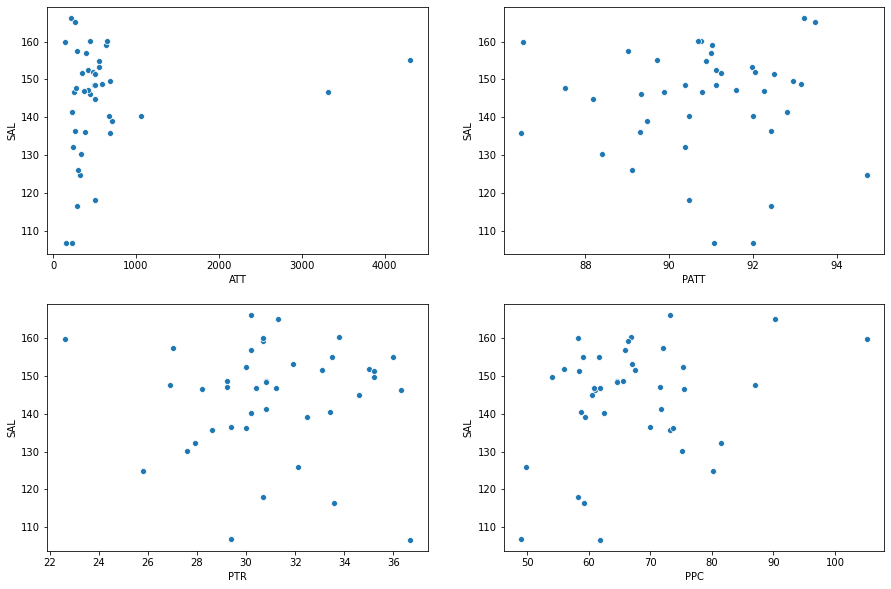

In [58]:
fig = plt.figure(figsize=(15, 10))
ax1= fig.add_subplot(2, 2, 1)

sns.scatterplot(data=schools, x='ATT', y='SAL', ax=ax1)
ax1= plt.subplot(2, 2, 2)
sns.scatterplot(data=schools, x='PATT', y='SAL')
ax1= plt.subplot(2, 2, 3)
sns.scatterplot(data=schools, x='PTR', y='SAL')
ax1= plt.subplot(2, 2, 4)
sns.scatterplot(data=schools, x='PPC', y='SAL')
plt.show()

In [113]:
q3 = np.quantile(schools['SAL'], 0.75)
q1 = np.quantile(schools['SAL'], 0.25)
iqr = q3 - q1
    # finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
    
schools[(schools['SAL'] <= lower_bound) | (schools['SAL'] >= upper_bound)]
    

,School,ATT,PATT,PTR,SAL,PPC
23,East Lake,225.3,91.07,36.7,106.74,61.91
40,Connally,161.7,92.01,29.4,106.86,49.04


In [77]:
def check_outlier(df, x):
    q3 = np.quantile(df[x], 0.75)
    q1 = np.quantile(df[x], 0.25)
    iqr = q3 - q1
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    df[(df[x] <= lower_bound) | (df[x] >= upper_bound)]
    
    return outlier

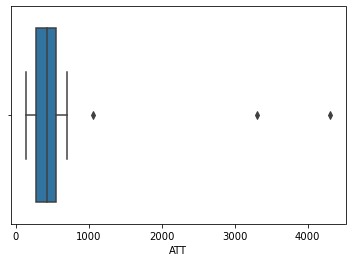

In [60]:
ax = sns.boxplot(data=schools, x='ATT')

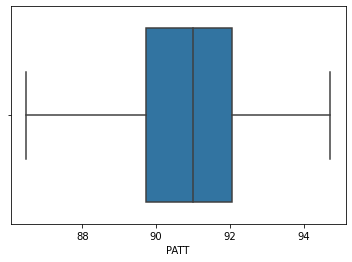

In [61]:
ax = sns.boxplot(data=schools, x='PATT')

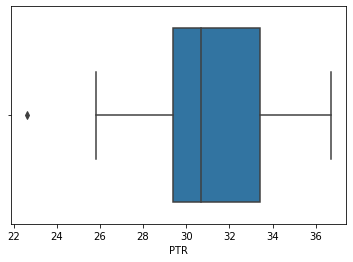

In [63]:
ax = sns.boxplot(data=schools, x='PTR')

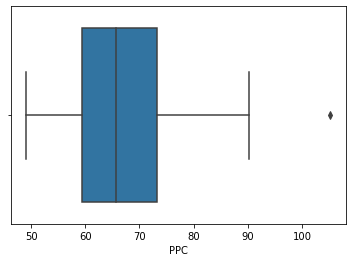

In [65]:
ax = sns.boxplot(data=schools, x='PPC')

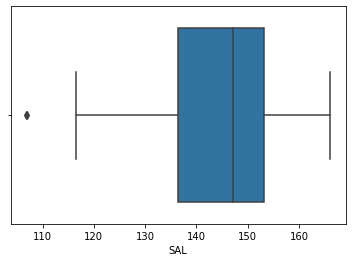

In [112]:
ax = sns.boxplot(data=schools, x='SAL')